<a href="https://colab.research.google.com/github/rui233/Computer-vision-and-deep-learning/blob/master/Traffic_Signs_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle

Using TensorFlow backend.


In [0]:
import pandas as pd
import random

In [0]:
np.random.seed(0)

In [6]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  valid_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)

print(type(train_data))

x_train,y_train = train_data['features'], train_data['labels']
x_val,y_val = valid_data['features'], valid_data['labels']
x_test,y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(x_train.shape[0] == y_train.shape[0]),"The number of image is not equal to the number of labels"
assert(x_val.shape[0] == y_val.shape[0]),"The number of image is not equal to the number of labels"
assert(x_test.shape[0] == y_test.shape[0]),"The number of image is not equal to the number of labels"
assert(x_train.shape[1:] == (32,32,3)),"The number of image is not equal to the number of labels"
assert(x_val.shape[1:] == (32,32,3)),"The number of image is not equal to the number of labels"
assert(x_test.shape[1:] == (32,32,3)),"The number of image is not equal to the number of labels"

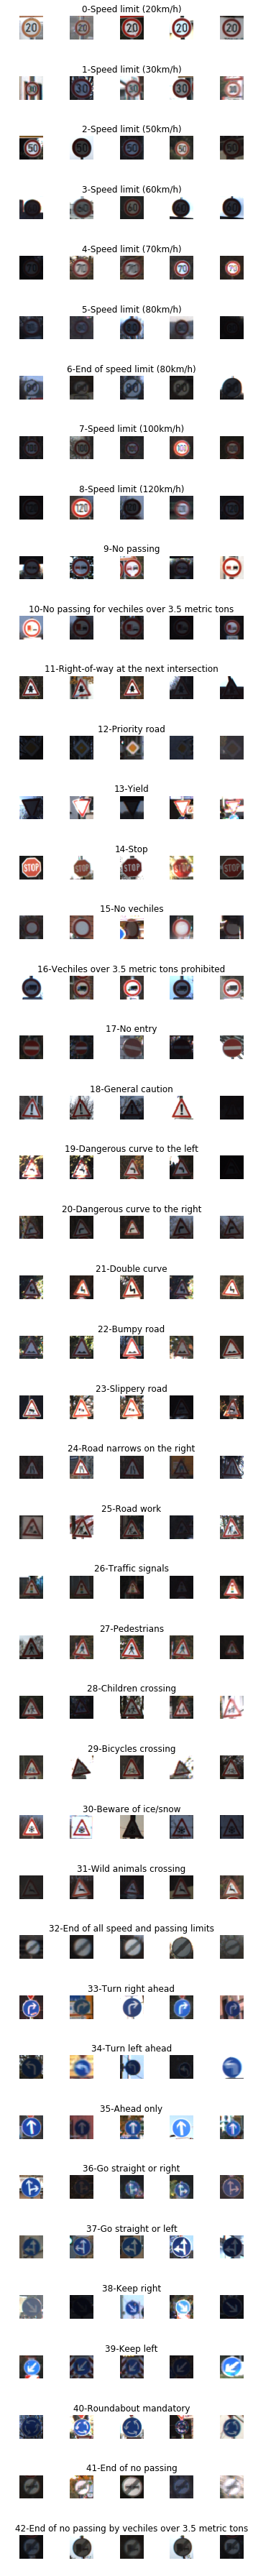

In [9]:
data = pd.read_csv('german-traffic-signs/signnames.csv')


num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()

for i in range(cols):
    for j,row in data.iterrows():
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row["SignName"])
            num_of_samples.append(len(x_selected))

    

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

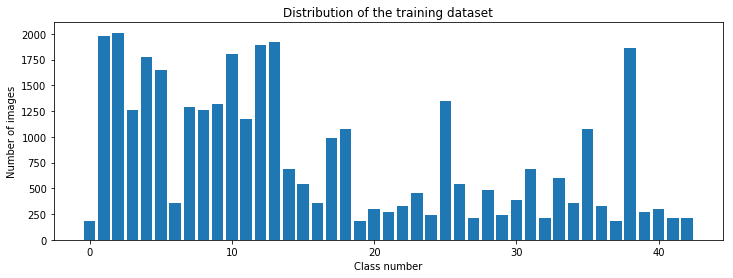

In [10]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


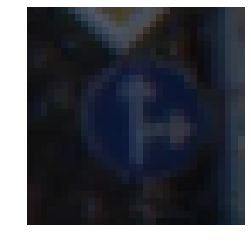

In [11]:
import cv2

plt.imshow(x_train[1000])
plt.axis("off")
print(x_train[1000].shape)
print(y_train[1000])

(32, 32)


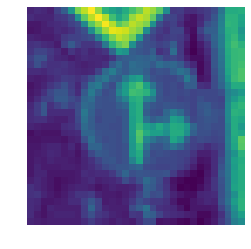

In [12]:
def grayscale(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img
img = grayscale(x_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


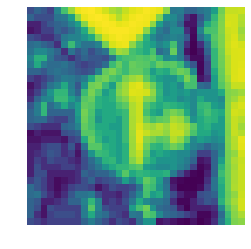

In [13]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

x_train = np.array(list(map(preprocessing,x_train)))
x_val = np.array(list(map(preprocessing,x_val)))
x_test = np.array(list(map(preprocessing,x_test)))


(34799, 32, 32)


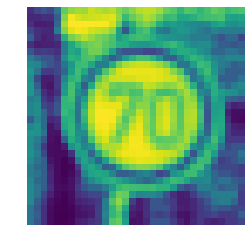

In [15]:
plt.imshow(x_train[random.randint(0,len(x_train) - 1)])
plt.axis("off")
print(x_train.shape)

In [0]:
x_train = x_train.reshape(34799,32,32,1)
x_val = x_val.reshape(4410,32,32,1)
x_test = x_test.reshape(12630,32,32,1)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val,43)

In [0]:
def leNet_modified_model():
  model = Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation = 'relu'))
  model.add(Conv2D(60,(5,5),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  
  model.add(Flatten())
  model.add(Dense(500,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation = 'softmax'))
  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model



In [51]:
model = leNet_modified_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 30)         

In [52]:
history = model.fit(x_train,y_train,epochs = 10,validation_data = (x_val,y_val), batch_size = 400, verbose = 1 ,shuffle =1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 3s 97us/step - loss: 2.4881 - acc: 0.3314 - val_loss: 0.7696 - val_acc: 0.7639
Epoch 2/10
34799/34799 [==============================] - 3s 75us/step - loss: 0.7304 - acc: 0.7746 - val_loss: 0.3323 - val_acc: 0.9063
Epoch 3/10
34799/34799 [==============================] - 3s 76us/step - loss: 0.4010 - acc: 0.8730 - val_loss: 0.2390 - val_acc: 0.9347
Epoch 4/10
34799/34799 [==============================] - 3s 75us/step - loss: 0.2846 - acc: 0.9097 - val_loss: 0.1705 - val_acc: 0.9574
Epoch 5/10
34799/34799 [==============================] - 3s 76us/step - loss: 0.2211 - acc: 0.9307 - val_loss: 0.1514 - val_acc: 0.9610
Epoch 6/10
34799/34799 [==============================] - 3s 76us/step - loss: 0.1855 - acc: 0.9407 - val_loss: 0.1209 - val_acc: 0.9664
Epoch 7/10
34799/34799 [==============================] - 3s 76us/step - loss: 0.1626 - acc: 0.9493 - val_loss: 0.1101 - val_acc:

Text(0.5, 0, 'epoch')

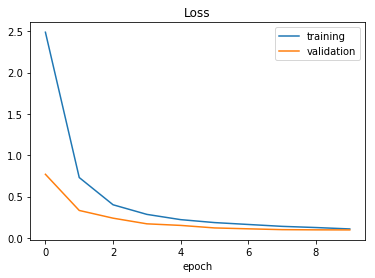

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

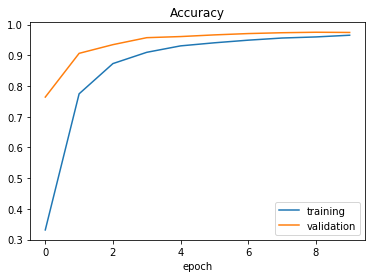

In [54]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [55]:
score = model.evaluate(x_test,y_test,verbose = 0)
print('Test score',score[0])
print('Test Accuracy',score[1])

Test score 0.13949841978330746
Test Accuracy 0.9573238321928778


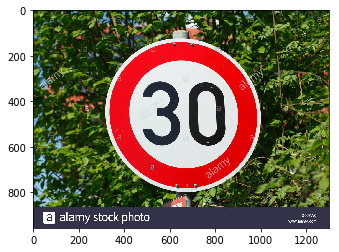

In [56]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
 


(32, 32)


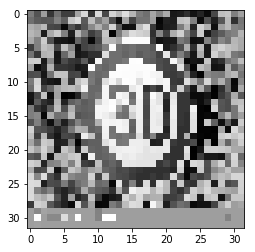

In [57]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
img = img.reshape(1, 32, 32, 1)

In [59]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [1]


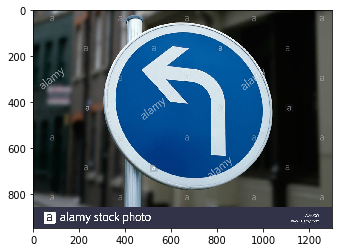

In [60]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


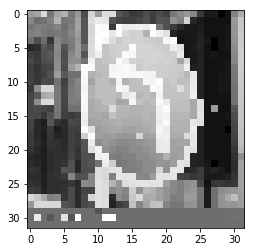

In [61]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [62]:
img = img.reshape(1, 32, 32, 1)
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [5]


(32, 32)


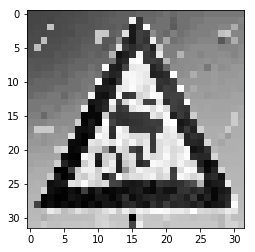

In [63]:
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [64]:
img = img.reshape(1, 32, 32, 1)
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [23]


(32, 32)


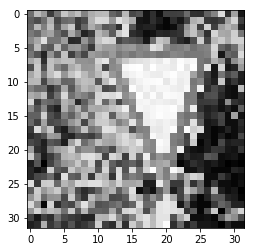

In [65]:
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [66]:
img = img.reshape(1, 32, 32, 1)
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [2]


(32, 32)


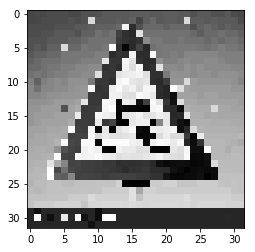

In [67]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [68]:
img = img.reshape(1, 32, 32, 1)
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [31]
